# Applied Machine Learning, Module 1:  A simple classification task

## Import required modules and load data file

For our first machine learning exploration, we're going to build an extremely simple form of object recognition system. Now although the example we'll use is very simple, it does reflect many of the same key machine learning concepts that go into building real world commercial systems. 

The dataset we're going to use is a small, very simple, example dataset derived from one originally created by Dr. Iain Murray at the University of Edinburgh for the task of training a classifier to distinguish between different types of fruit.

So, we've reformatted his original data slightly and added one or two extra simulated features such as a color score for instructional purposes. This dataset is called fruit_data_with_colors.txt. 

To solve machine learning problems, you can thing of the input data as a table. Where each object, so in our case a piece of fruit, is represented by a row, and the attributes of the object, the measurement, the color, the size, and so forth in our case for a piece of fruit, the features of the fruit are represented by the values that you see across the columns. In a supervised learning problem, the dataset will also typically contain a special column with the label of the object, if the dataset does not have such a field already. 

So the first thing we are going to do is to load the fruit dataset file using the very handy `read_table` command in pandas. Now, this will read the dataset from disk, and store it into a data frame variable that we'll call fruits here.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

Okay, let's look at this dataset and dump out the first few rows of the data frame. 

In [2]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

So, here we can see that each row of the dataset represents one piece of fruit as represented by several features that are in the table's columns. So, in order, the columns that we see are fruit label. So this is the training label that we used. It's a number that corresponds to the general type of fruit. So for example, one is an apple, two is a mandarin orange, three is a regular orange, and so forth. This label was supplied by the human creator of the dataset.

The fruit name and fruit subtype columns contain text descriptions of the general and specific fruit categories. And the fruit name is a text form of the corresponding fruit label in the same row. Now, we won't be using these name columns as features. We've just included them here to make the dataset a bit more readable for our purposes.

After that, the features in this representation include measurements for each fruit that capture its mass in grams and its width and height in centimeters. And finally, there's a feature stored in a column called color score that's meant to be a single number that captures a rough idea of the color of the fruit. So in a real system, this would actually be something more sophisticated, like a histogram of the distribution of colors, or maybe the pixels from an actual image or video of the fruit. But for our purposes, we're going to just summarize the color along a spectrum scale that'll be a handy summary that we can use that will just be easy to visualize. So scores close to one mean the fruit is red. Scores around 0.7 indicate yellow, and so forth.

In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Now, what we're doing above here is defining a dictionary that takes a numeric fruit label as the input key and returns a value that's a string with the name of the fruit. This dictionary just makes it easier to convert the output of a classifier prediction to something a person can more easily interpret, the name of a fruit in this case.

**The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.**

So, looking at this data frame, we can see that it contains 59 rows corresponding to 59 different pieces of fruit that have been measured and entered into the table. So our goal here is to build a classifier from this data that can predict the correct type of fruit for any given observation of its features such as mass, height, width, and color score. So for example, can we tell based on the color score and the dimensions, the difference between an orange and a lemon and have the classifier predict the type of piece of fruit correctly just from its observed measurements?

## Examining the data

Now, assuming for the moment that we already we had a classifier ready to go, how would we know if its predictions were likely to be accurate? Well, we could choose a fruit sample, called a test sample, for which we already had a label. So we could feed the features of that piece of fruit into the classifier, and then compare the label that the classifier predicts with the actual true label of the fruit type. So here's a very important point, if we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same fruit sample later as a test sample to also evaluate the classifier. Why is that? Well, a key ability that our classifier needs to have is that it needs to work well on any input sample, any new pieces of fruit that we might see in the future, not just on the ones that we have on our training set. 

Because our classifier could simply memorize every sample in the training set, it'd be pretty trivial to just give back the correct label for any one of the same samples later, right? So, measuring the classifier's performance later using the same samples that we've used to train it in the first place doesn't tell us anything about how well the classifier is likely to work for a fruit that we haven't seen before. It will only tell us what we already know about what's in the training set.

So since our only source of labeled data is the dataset we've been given, to estimate how well the classifier will do on future samples, what we'll do is split the original dataset into two parts. We'll have an array of labeled samples called the training set that will be used to train the classifier. And then we'll hold out the remaining labeled samples and put them into a second separate array called the test set that will be used to then evaluate the trained classifier.

So to create training and test sets from a input dataset, Scikit-learn provides a handy function that will do this split for us, called, not surprisingly, `train_test_split`. And here's an example of how we're going to use it. 

This function randomly shuffles the dataset and splits off a certain percentage of the input samples for use as a training set, and then puts the remaining samples into a different variable for use as a test set. So in this example, we're using a 75-25% split of training versus test data. And that's a pretty standard relative split that's used. 

In [4]:
# Splitting Training and Testing Data

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

As a reminder, when we're using Scikit-learn, we'll denote the data that we have using different flavors of the variable X, capital X, which is typically a two dimensional array or data frame. And the notation we'll use for labels will be typically based on lowercase y, which is usually a one dimensional array, or a scalar. Now, note the use of the random state parameter in the train_test_split function. So this random state parameter provides a seed value to the function's internal random number generator. If we choose different values for that seed value, that will result in different randomized splits for training and test. So, if we want to get the same training and test split each time, we just make sure to pass in the same value of the random state parameter. And so here, we're going to set that parameter to zero for all our examples.

The training test split function will put the training set here into `X_train`, the test set into `X_test`, the training labels into `y_train`, and the test labels into `y_test`. So this is a 75-25 partitioning of the original data into these two parts. And this is the variable naming convention we'll use for pretty much all of our coding. We'll put the rows of the data without the label, the training instances into this capital `X` variable, and the list of corresponding labels for those rows into a variable called lowercase `y`. 

When using the training set and the test set, we'll then use `X_train` that holds the training instances to train the classifier, and `X_test` to evaluate the classifier after it's been trained. 

In [5]:
print(fruits.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59, 7)
(44, 4)
(15, 4)
(44,)
(15,)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

So here we can see the results of the function, applying this train_test_split function, you can see that it has indeed split our fruit dataset into training and test sets with the correct proportion of samples. Now that we have a training and a test set, we're ready for the next step.

In general, if you're thinking about applying machine learning to a data set, it's a really good first step to actually look at the data set first, maybe using some simple visualization methods, or even simply scrolling through to look at the various values in the different rows before proceeding. And there are several reasons for doing this.

First, it's helpful to simply get a sense for what's actually in the data set. because it may be that in inspecting the features of each object, you might get a better idea of what type of cleaning or preprocessing still needs to be done to the data. And of the range of values or the distribution of values that is typical for each attribute or each feature. 

This initial exploration can be especially valuable when you're dealing with complex objects like text that may be represented by many features that are extracted using a series of several pre-processing steps. For example, you might discover that the data set you got has a single column with person's name that still needs to be split into two separate first and last name columns. For example, if you're using the name as one of the prediction feature, that might be important. Second, you might notice missing or noisy data, or maybe some specific inconsistencies, such as the wrong data type being used for a column, incorrect or inconsistent units of measurement for a particular column, or maybe you'll notice that there aren't enough examples of a particular labeled class. You might notice, for example, that some measurements of a person's weight; let's say you're doing a health application with a patient record for each row. Some might accidentally have the weight in grams instead of kilograms and so forth. And that can make obviously a huge difference in how accurate your results are. So inspecting and visualizing the data will help you detect and understand these potential sources of noise or errors.

And finally, it might turn out that for your data set, your problem is actually solvable without machine learning. Now, this doesn't happen all that often, but if it does, you can save yourself considerable time by simply looking at what data exists in your data set. So one scenario, your data set might actually contain a feature of that, is clearly a strong indicator of the label that you want to predict. For example, if your goal was to predict whether a house's location was in New York City versus San Francisco based on attributes like its sales price, its elevation above sea level, how big its rooms are and so forth. It could be that your data set might also include, let's say a URL to a photo of the house. And that image might contain GPS coordinates to the house within its metadata. Or maybe the URL encodes location in a slightly non-obvious but human recognizable way that you can pick out. And you solve your problem just by looking at the data. So, as I said, this scenario isn't all that common, but it does happen. And so, a brief check of your data set could save you a lot of unnecessary work.

Finally we'll do all our initial visualization and feature analysis on this training set. And we're only going to use the test set for actually evaluating the classifier once it's trained. So now that we have a training set selected, let's create some simple visualizations to look at how the features in the objects in the training set, in our case different fruits, relate to each other and to the labels. So with these visualizations, we get at least two major benefits. First, we can get an idea of the range of values that each feature takes on. And we could immediately see any unusual outliers that are very different from other points. And that might indicate noise or a missing feature or other problem with the data set. And second, we may be able to get a better idea how likely it is that a machine learning algorithm could do well at predicting the different classes. By seeing how well clustered and well separated the different types of objects are in *feature space*. So *feature space* refers to the representation of an object using specific features that are in certain columns of the data that we have. So for example, if the features for objects with the same label all the lemons have similar feature values, we should see a well-defined cluster appear in the visualization. While if the features for objects that have different labels tend to be quite different, we should see these well separated into visibly different areas of the plot.

So having objects whose classes are well defined and well separated in feature space is a good indication that suggests the classifier is likely to be able to predict the class label from the features with good accuracy. Now the visualization techniques that I'll be showing here work well when you have a relatively small number of features, let's say less than 20. Later, when we cover unsupervised learning, you'll learn how to create visualizations of data sets that use a very large number of feature dimensions, so hundreds or even thousands or millions, to represent each object. 

But for now, the first visualization tool we'll use is called a feature pair plot and that's shown here.

<IPython.core.display.Javascript object>


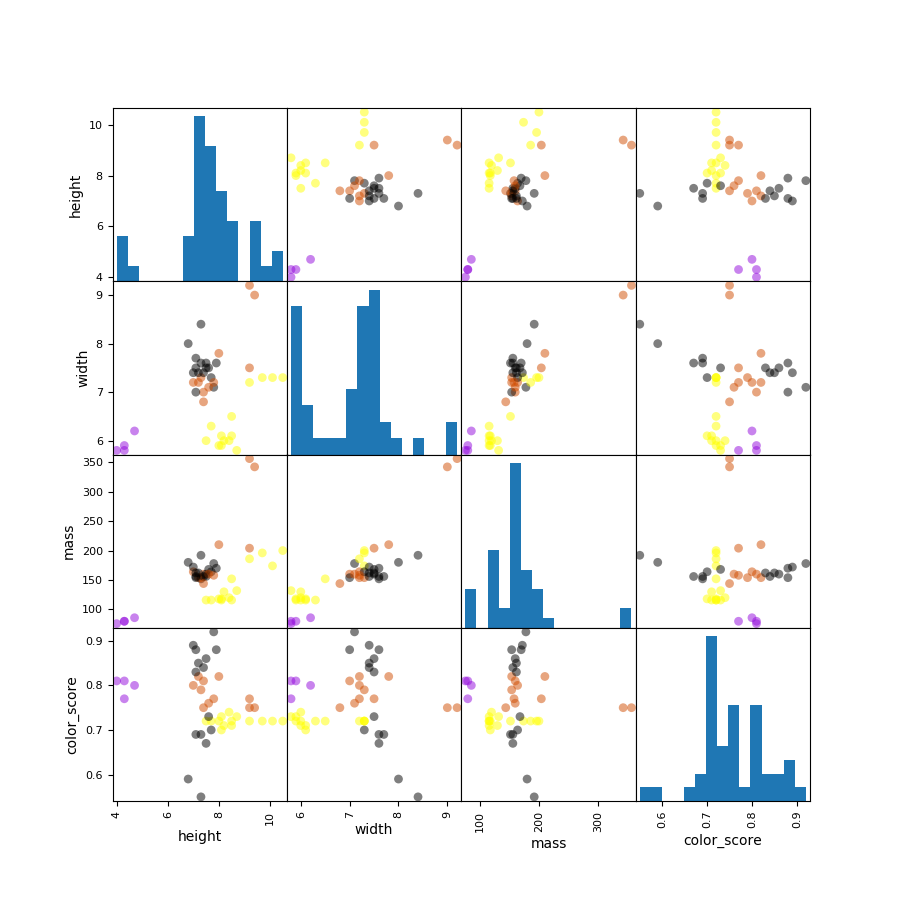

In [6]:
# plotting a scatter matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, 
                                     figsize=(9,9), cmap=cmap)

So this plot shows all possible pairs of features and produces a scatter plot for each pair, showing how the features are correlated to each other or not. Each point in the scatter plot represents a piece of fruit, colored according to the class it belongs to. And positioned using the parafeatures assigned to that scatter plot. Along the diagonal is a histogram showing the distribution of feature values for that feature. 

So in this pair plot, the dimensions shown here in order are, height, width, mass. And color score of the fruit examples in our training set. So the upper left corner of the histogram here shows the distribution of the height feature for all samples in the training set. And the scatter plot to its immediate right plots the width of each sample on the x-axis and the height of the sample on the y-axis. 

Just by looking at this pair plot, we can already see that some pairs of features, like the height and color score in the top right corner here, are good for separating out different classes of fruit. And this suggests that a classifier that was trained using those features could likely learn to classify the various fruit types reasonably well. 

We can also look at features that use a subset of three features by creating a three dimensional plot. 

<IPython.core.display.Javascript object>


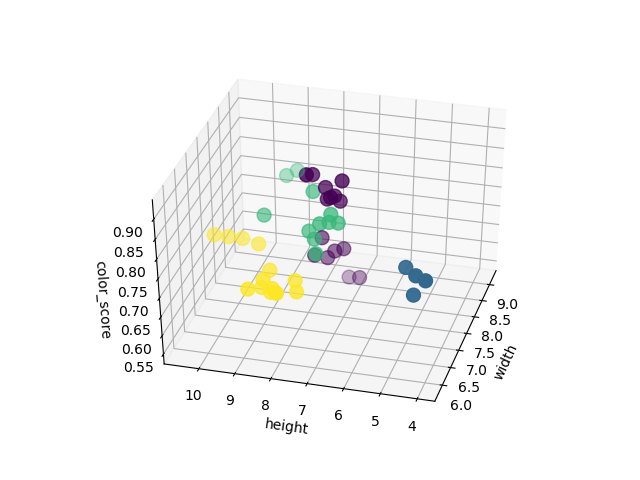

In [7]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

So in this example, we plot different fruits using three coordinates. So here we the show the width, the height, and the color score. Here again, each point represents a single piece of fruit and its color according to its fruit label value.

## K-Nearest Neighbors Classification

Now that we've gotten a sense for what's in our data set, as a simple example to get started, we're going to use this data set to train a classifier that will automatically identify any future pieces of fruit that might come our way based on the features available to the classifier such as the object's color, size and mass. To do this, we'll use a popular and easy to understand type of machine learning algorithm known as **k-nearest neighbors** or **k-NN**. The K-Nearest Neighbors algorithm can be used for classification and regression. Though, here we'll focus for the time being on using it for classification. 

k-NN classifiers are an example of what's called instance based or memory based supervised learning. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later. The k in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 

In particular, the k-NN algorithm has three steps that can be specified. First of all, when given a new previously unseen instance of something to classify a k-NN classifier will look into its set of memorized training examples to find the k examples that have closest features. Second, the classifier will look up the class labels for those k-Nearest Neighbor examples. And then once it's done that, it will combine the labels of those examples to make a prediction for the label of the new object. Typically, for example, by using simple majority vote.

So what does it mean to have a one nearest neighbor rule? Where does it come up with different class assignments in the first place? The algorithm will look at all of our points and see which one is closest, looking at the nearest single neighbor. So we're looking at $k=1$. That means we're trying to find the one point that's closest to our new point. Our new point that we're questioning is called our query point. This is the point we want to classify.

And because the training set points are labeled (recall our example comes with labels), in the $k = 1$ nearest neighbor case, the classifier will simply assign to the query point, the class of the nearest neighbor object.

The lines where we transition from one class to another (ie is equal distant from one point with a given label as it is from another), this line is called the decision boundary (because query points that are on one side of the line get mapped to one class, and points that are on the other side of the line get mapped to a different class).

In cases where k is bigger than 1, we use a simple majority vote. We take the class that's most predominant in the labels of the neighbor examples. Typically the value of $k$ is odd so that we avoid ties, otherwise we can choose for the tie to be broken randomly.

And that's basically all there is to the basic mechanism for k-NN classifiers. More generally, to use the nearest neighbor algorithm, we specify four things. First, we need to define what distance means in our feature space, so we know how to properly select the nearby neighbors. In the example that I just showed you with the fruit data set, we used the simple straight line, or euclidean distance to measure the distance between points. Second, we must tell the algorithm how many of these nearest neighbors to use in making a prediction. This must be a number that is at least one. Third, we may want to give some neighbors more influence on the outcome. For example, we may decide that neighbors that are closer to the new instance that we're trying to classify, should have more influence, or more votes on the final label. Finally, once we have the labels of the k nearby points, we must specify how to combine them to produce a final prediction. 

The most common distance metric and the one that scikit-learn uses by default is the euclidean no straight line distance. Also by default scikit-learn will apply for the fourth criterion a simple majority vote, and it will predict the class with the most representatives among the nearest neighbors.

### Create train-test split

Here we asume that you've already loaded the data, loaded the required modules, and checked the data to see what will be relevant to making the ML model. 

So, for this example we'll define a variable capital `X` that holds the features of our data set without the label. We're going to use the mass, width, and height of the fruit as our features. So, this collection of features is called the feature space. We define a second variable, lower case `y`, to hold the corresponding labels for the instances in `X`.

Now, we can pass `X` and `y` to the `train_test_split` function in scikit-learn. Normally the splitting into training and test sets is done randomly, but for this lecture I want to make sure we all get the same results. So, we set the random state parameter to a specific value (ie `random_state=0`).

In [8]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

The results of the `train_test_split` function are put into the four variables we see on the left. And these are marked as `X_train`, `X_test`, `y_train`, and `y_test`. We're going to be using this `X` and `y` variable naming convention throughout the course to refer to data and labels.

### Create classifier object

Once we have our train-test split, we then need to create an instance of the classifier object, in this case a k-NN classifier, and then set the important parameter in this case the number of neighbors to a specific value to be used by the classifier.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

We then train the classifier by passing in the training set data in `X_train`, and the labels in `y_train` to the classifiers fit method. Now, the k-NN classifier that I'm using in this case is an example of a more general class called an estimator in scikit-learn. All estimators have a fit method that takes the training data, and then changes the state of the classifier, or estimator object to essentially enable prediction once the training is finished. In other words it updates the state of the k-NN variable here, which means, that in the case of k nearest neighbors it will memorize the training set examples in some kind of internal storage for future use.

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

And that's really all there is to training the k-NN classifier, and the first thing we can do with this newly trained classifier is to see how accurate it's likely to be on some new, previously unseen instances. To do this, we can apply they classifier to all the instances in the test set that we've put aside, since these test instances were not explicitly included in the classifiers training.

### Estimate the accuracy of the classifier on future data, using the test data

One simple way to assess if the classifier is likely to be good at predicting the label of future, previously unseen data instances, is to compute the classifier's accuracy on the test set data items. To do this we use the score method for the classifier object. This will take the test set points as input and compute the accuracy. The accuracy is defined as the fraction of test set items, whose true label was correctly predicted by the classifier. 

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

We can also use our new classifier to classify individual instances of fruit. In fact this was our goal in the first place, was to be able to take individual instances of objects and assign them a label.

So, here, for example we'll enter the mass, width, and height for a hypothetical piece of fruit that is fairly small. And if we ask the classifier to predict the label using the predict method...

In [12]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

we can see the output is that it predicts it's a mandarin orange!

We can then pass a different example, which is maybe a larger, slightly elongated fruit that has a height that's greater than the width and a larger mass. 

In [13]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In this case, using the predict method on this instance results in a label that says the classifier thinks this object is a lemon.

### Plot the decision boundaries of the k-NN classifier

Now let's use a utility function called `plot_fruit_knn` that's included in the shared utilities module that comes with this course. This will produce colored plots that have the decision boundaries. This way we can then try out different values of k for ourselves to see what the effect is on the decision boundaries. 

The uniform parameter that we pass in here, as the last parameter is the weighting method to be used. So here we're passing in the string `'uniform'`, which means to treat all neighbors equally when combining their labels. We can also try changing this to the word `'distance'` if we want to try a distance weighted method.

C:\Users\jtownson\Documents\Data_Sience_w_Python\applied_machine_learning\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\jtownson\Documents\Data_Sience_w_Python\applied_machine_learning\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


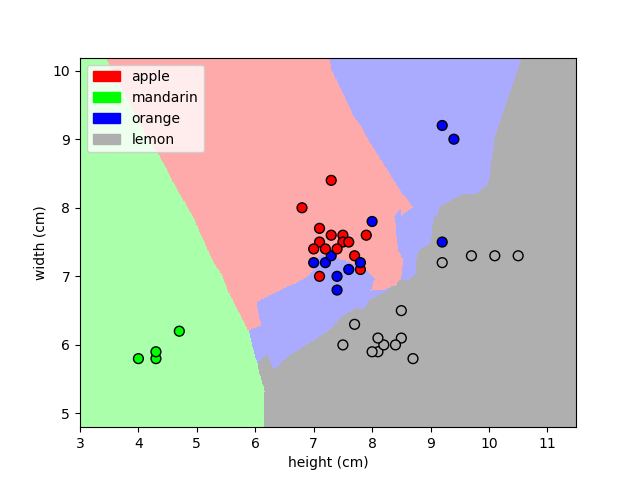

In [14]:
from adspy_shared_utilities import plot_fruit_knn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors


We can also see how our new classifier behaves for different values of k. So in this series of plots, we can see the different decision boundaries that are produced as k is varied from one to five to ten. We can see that when k has a small value like 1, the classifier is good at learning the classes for individual points in the training set, but with a decision boundary that's fragmented with considerable variation. This is because when $k = 1$, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points. 

For larger values of k, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. But possibly with some more mistakes in individual points. This is an example of what's known as the bias variance tradeoff. 

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

Given the changes in the classifier's decision boundaries we observed when we changed k, the natural question might be how the value of k affects the accuracy of the classifier. We can plot the accuracy as a function of k very easily using the below code:

<IPython.core.display.Javascript object>


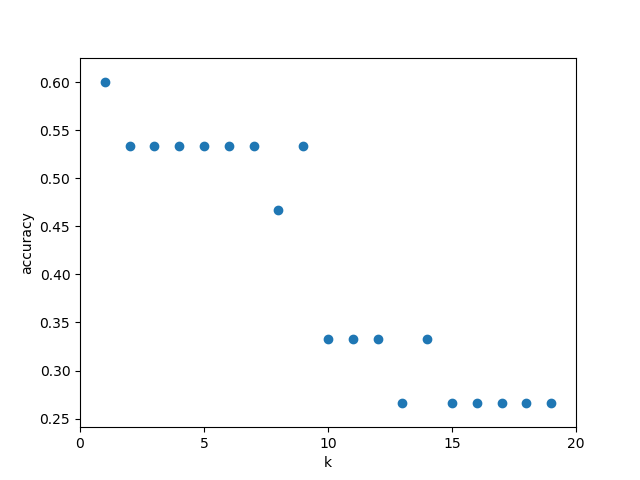

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

We see that, indeed, larger values of k do lead to worse accuracy for this particular dataset and fixed single train test split. Keep in mind though, these results are only for this particular training test split. To get a more reliable estimate of likely future accuracy for a particular value of k, we would want to look at results over multiple possible train test splits. 

### How sensitive is k-NN classification accuracy to the train/test split proportion?

In general, the best choice of the value of k, that is the one that leads to the highest accuracy, can vary greatly depending on the data set. In general with k-nearest neighbors, using a larger k suppresses the effects of noisy individual labels, but results in classification boundaries that are less detailed.

<IPython.core.display.Javascript object>


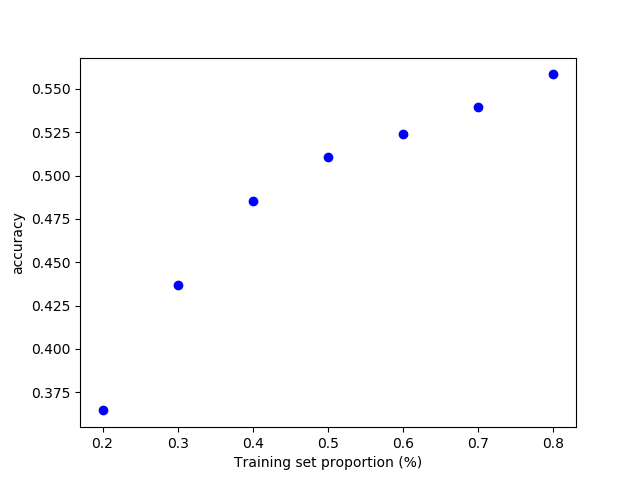

In [16]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');